In [1]:
import numpy as np
import matplotlib.pyplot as plt


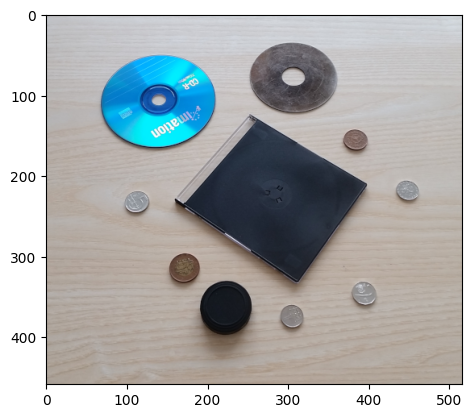

In [2]:
image=plt.imread(".\Data\cd_box.png")
plt.imshow(image)


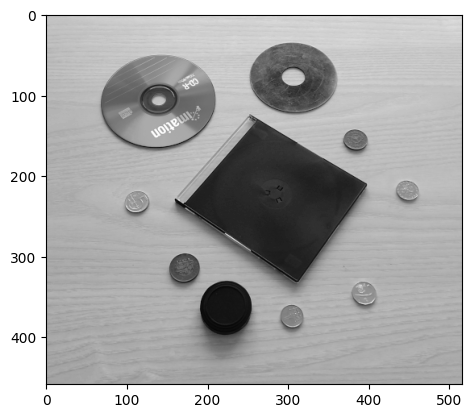

In [18]:

img_gray = image[:,:,0] * 0.2989 + image[:,:,1] * 0.5870 + image[:,:,2] * 0.1140   
plt.imshow(img_gray,cmap="gray")


In [27]:
def convert_to_grayscale(img:np.array)->np.array:
    if len(img.shape)==3:
        img = img[:,:,0] * 0.2989 + img[:,:,1] * 0.5870 + img[:,:,2] * 0.1140 
    return img

def histogram(array:np.array,bins:int)->np.array:
    histogram=np.zeros(bins)
    grayscale_img=convert_to_grayscale(array)
    for row in grayscale_img:
        for px in row:
           index=int((bins-1)*px)
           histogram[index]+=1 
    return histogram

def cumulative_histogram(array:np.array)->np.array:
    num_bins=array.shape[0]
    hist=np.zeros(num_bins)
    
    for index in range(num_bins):
        hist[index]=hist[index-1]+array[index]

    hist=hist/hist[-1]
    return  hist

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        4.000e+00, 6.000e+00, 1.500e+01, 2.000e+01, 2.800e+01, 4.500e+01,
        6.400e+01, 6.700e+01, 8.400e+01, 8.200e+01, 1.290e+02, 1.560e+02,
        1.270e+02, 1.350e+02, 1.240e+02, 1.320e+02, 2.390e+02, 5.660e+02,
        6.650e+02, 4.210e+02, 1.760e+02, 1.250e+02, 8.600e+01, 1.030e+02,
        8.700e+01, 8.300e+01, 1.550e+02, 2.820e+02, 5.000e+02, 8.520e+02,
        1.096e+03, 1.262e+03, 1.262e+03, 1.303e+03, 1.282e+03, 1.335e+03,
        1.404e+03, 1.227e+03, 1.222e+03, 1.399e+03, 1.244e+03, 1.087e+03,
        1.011e+03, 8.580e+02, 7.520e+02, 7.710e+02, 6.380e+02, 5.110e+02,
        5.600e+02, 3.870e+02, 2.810e+02, 2.840e+02, 2.780e+02, 2.270e+02,
        2.110e+02, 1.720e+02, 1.780e+02, 1.740e+02, 1.760e+02, 1.840e+02,
        1.630e+02, 1.850e+02, 1.830e+02, 2.050e+02, 1.910e+02, 2.020e+02,
        2.010e+02, 2.130e+02, 2.500e+02, 2.370e+02, 2.370e+02, 2.840e+02,
        2.980e+02, 2.550e+02, 2.510e+0

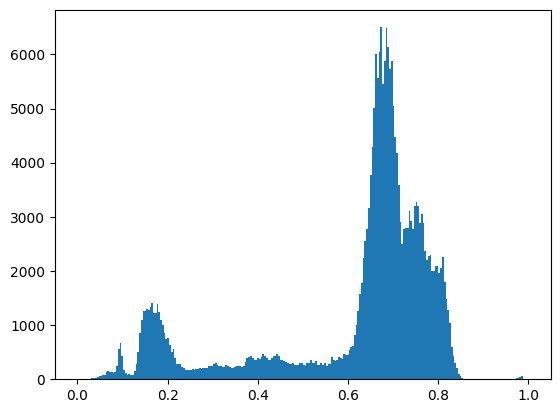

In [28]:
num_bins=256
original_histogram=histogram(image,num_bins)
plt.hist(np.linspace(0,1,num_bins),bins=num_bins,weights=original_histogram)

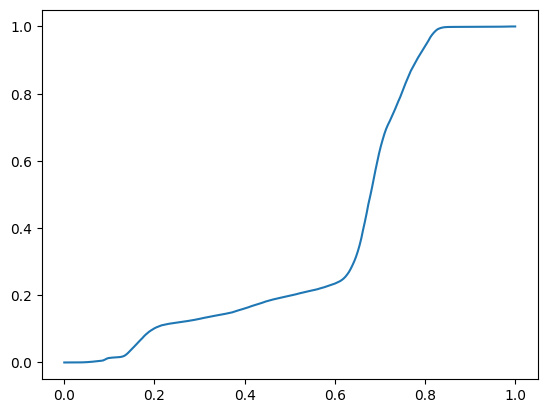

In [29]:
cum_hist=cumulative_histogram(original_histogram)
plt.plot(np.linspace(0,1,len(cum_hist)),cum_hist)


In [30]:
def equalize_histogram(img:np.array,cumulative_histogram:np.array)->np.array:
    width,height=img.shape[0],img.shape[1]
    equalized_img=np.zeros(img.shape)
    for w in range(width):
        for h in range(height):
            index=int(img[w][h]*256)
            swap_value=cumulative_histogram[index]
            equalized_img[w][h]=swap_value
    return equalized_img

In [31]:
equalized_image=equalize_histogram(img_gray,cum_hist)

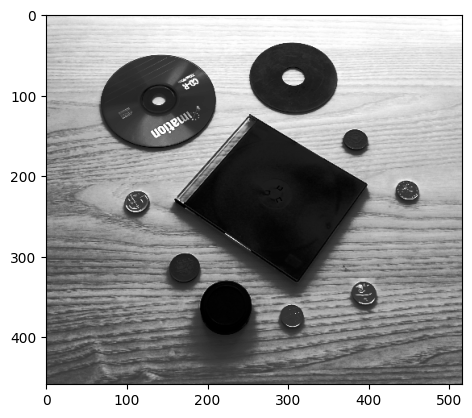

In [32]:
plt.imshow(equalized_image,cmap="gray")

In [33]:
reshaped_image=np.reshape(equalized_image,equalized_image.shape[0]*equalized_image.shape[1])
max(reshaped_image)

1.0

(array([ 814.,  644., 1224.,  991.,  493., 1342.,    0., 1051., 1251.,
        1277.,    0., 1325., 1310.,    0., 1311., 1414., 1228.,    0.,
        1222., 1375.,    0., 1241., 1073., 1037.,  882., 1509.,  649.,
        1076.,  963., 1058.,  875.,  974.,  917.,  825.,  963.,  940.,
         901.,  732., 1071.,  849., 1102.,  765.,  907.,  774., 1126.,
         873.,  830., 1045.,  865., 1116.,  841.,  828.,  996.,  877.,
        1104.,  876.,  735., 1150.,  805.,  898.,  483., 1120.,  688.,
         860.,    0., 1057., 1330.,    0., 1655.,    0.,    0., 1829.,
           0., 2288.,    0.,    0., 2608.,    0.,    0.,    0., 2820.,
           0.,    0.,    0., 3307.,    0.,    0.,    0., 3952.,    0.,
           0.,    0.,    0.,    0., 4313.,    0.,    0.,    0.,    0.,
           0., 5051.,    0.,    0.,    0.,    0.,    0., 6028.,    0.,
           0.,    0.,    0.,    0.,    0., 5597.,    0.,    0.,    0.,
           0.,    0.,    0., 6212.,    0.,    0.,    0.,    0.,    0.,
      

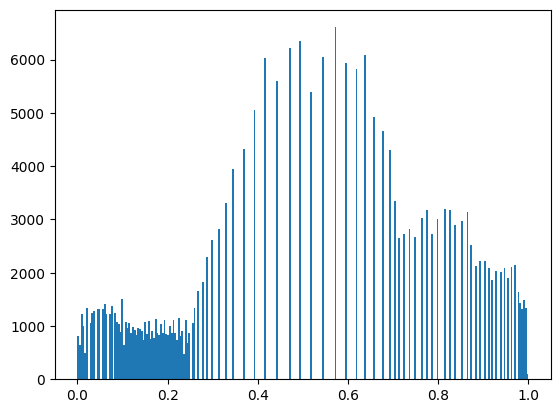

In [35]:
equalized_hist=histogram(equalized_image,num_bins)
plt.hist(np.linspace(0,1,num_bins),bins=num_bins,weights=equalized_hist)

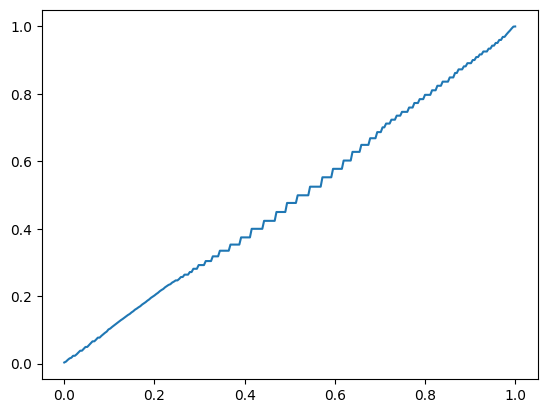

In [36]:
equalized_cumulative_hist=cumulative_histogram(equalized_hist)
plt.plot(np.linspace(0,1,equalized_cumulative_hist.shape[0]),equalized_cumulative_hist)